In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

#### Load Symptom Dataset

In [3]:
data = pd.read_csv('./Data/dataset.csv', sep = ',')

####  Load Symptom Severity 

In [4]:
severity = pd.read_csv('./Data/Symptom-severity.csv')

####  Load Exam Mapping

In [5]:
mapping = pd.read_csv('./Data/map.csv', sep = ';')

# Pre-processing

### One-hot encoding of Symptoms + Mapping the severity of the symptoms

In [14]:
symptomsCols = pd.unique(data.drop('Disease',1).values.flatten())
onlySymptomsCols=[]
for elem in (symptomsCols[symptomsCols==symptomsCols]):
    onlySymptomsCols.append(elem.replace(' ',''))

weightsFromSymptom = dict()

indexing = severity.to_dict()['Symptom']
weights = severity.to_dict()['Weight']
for elem in indexing:
    weightsFromSymptom[indexing[elem].replace(' ','')]=weights[elem]

for elem in onlySymptomsCols:
    if(elem.replace(' ', '') not in indexing.values()):
        weightsFromSymptom[elem.replace(' ','')]=1

symptomsCols = np.insert(onlySymptomsCols, 0, 'Disease')
symptomsCols

dataf = []
for elem in data.values:
    line=[]
    line.append(elem[0])
    elemlist=[]
    oldline = elem.tolist()
    for e in (oldline):
        if(e==e):
            elemlist.append(e.replace(' ', ''))
    del elemlist[0]
    for symptom in onlySymptomsCols:
        if(elemlist.count(symptom)>0):
            weight = weightsFromSymptom[symptom.replace(' ','')]
            line.append(weight)
        else:
            line.append(0)
    dataf.append(line)

processedDataf = pd.DataFrame(data=dataf, columns=symptomsCols)
processedDataf.to_csv("./Data/processed.csv", index=False )
processedDataf

,Disease,itching,skinrash,nodalskineruptions,dischromicpatches,continuoussneezing,shivering,chills,wateringfromeyes,stomachpain,...,bladderdiscomfort,foulsmellofurine,continuousfeelofurine,skinpeeling,silverlikedusting,smalldentsinnails,inflammatorynails,blister,redsorearoundnose,yellowcrustooze
0,Fungal infection,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4918,Psoriasis,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0


### One-hot encoding of exams and diseases

In [15]:
mapeamentoCols = pd.unique(mapping.drop('Disease',1).values.flatten())

onlyTestCols=[]
onlyTestCols = mapeamentoCols[mapeamentoCols==mapeamentoCols]
dfCols = np.insert(onlyTestCols, 0, 'Disease')

dfValues = []
for elem in mapping.values:
    line=[]
    line.append(elem[0])
    elemlist= elem.tolist()
    del elemlist[0]
    for test in onlyTestCols:
        if(elemlist.count(test)>0):
            line.append(1)
        else:
            line.append(0)
    dfValues.append(line)

testsDf = pd.DataFrame(data=dfValues, columns=dfCols)
testsDf.to_csv("./Data/mapProcessed.csv", index=False)

testsDf

,Disease,Blood tests,Skin biopsy,Patch test,Complete blood count (CBC),Polymerase chain reaction (PCR),,Skin Prick Test (SPT),Intradermal Skin Test,Blood tests,...,Erythrocyte sedimentation rate (ESR),C-reactive protein (CRP),Antinuclear antibody (ANA),HLA-B27,Stool culture,Antigen Tests,Mantoux tuberculin skin test,MRI scan,Biopsy,Blood Tests
0,Drug Reaction,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Malaria,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allergy,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Hypothyroidism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Psoriasis,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,GERD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chronic cholestasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,hepatitis A,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,Osteoarthristis,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dataframe with all Symptoms + Exams associated with a Disease

In [16]:
finalDfCols= np.concatenate([onlyTestCols,onlySymptomsCols])

dfValues = []
for elem in processedDataf.values:
    for testLine in testsDf.values:
        if(testLine[0]==elem[0]):
            line= np.concatenate([testLine[1:], elem[1:]])
            dfValues.append(line)

finalDf = pd.DataFrame(data=dfValues, columns=finalDfCols)
finalDf.to_csv("./Data/final.csv", index=False)
finalDf

,Blood tests,Skin biopsy,Patch test,Complete blood count (CBC),Polymerase chain reaction (PCR),,Skin Prick Test (SPT),Intradermal Skin Test,Blood tests,Physicial examination,...,bladderdiscomfort,foulsmellofurine,continuousfeelofurine,skinpeeling,silverlikedusting,smalldentsinnails,inflammatorynails,blister,redsorearoundnose,yellowcrustooze
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4676,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4677,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
4678,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [17]:
print('Number of Symptoms:', len(severity['Symptom']))

for elem in (severity['Symptom'].tolist()) :
        if(elem  not in onlySymptomsCols  ):
            print(elem)

Number of Symptoms: 131
skin_rash
nodal_skin_eruptions
continuous_sneezing
joint_pain
stomach_pain
ulcers_on_tongue
muscle_wasting
burning_micturition
spotting_urination
weight_gain
cold_hands_and_feets
mood_swings
weight_loss
patches_in_throat
irregular_sugar_level
high_fever
sunken_eyes
yellowish_skin
dark_urine
loss_of_appetite
pain_behind_the_eyes
back_pain
abdominal_pain
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
blurred_and_distorted_vision
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroid
brittle_nails
swollen_extremeties
excessive_hunger
extra_marital_contacts
drying_and_tingling_lips
slurred_speech
knee_pain
hip_joint_pain
muscle_weakness
stiff_neck
swelling_joints
movement_stiffness
spinnin

### Split the data

In [18]:
symptomCount = len(onlySymptomsCols)
testCount = len(onlyTestCols)

#print(testCount)
#print(symptomCount)

[train,test] = train_test_split(finalDf,random_state=420)
trainA = np.array(train)
trainAX = trainA[:,testCount:]
trainAY = trainA[:,:testCount]

trainX=train.iloc[:,testCount:]
trainY=train.iloc[:,:testCount]
print(trainY[0:5])

testX=test.iloc[:,testCount:]
testY=test.iloc[:,:testCount]


       Blood tests   Skin biopsy   Patch test   Complete blood count (CBC)  \
1870             0             0            0                            0   
373              0             1            0                            0   
781              0             0            0                            0   
825              1             1            1                            0   
1667             0             0            0                            0   

       Polymerase chain reaction (PCR)     Skin Prick Test (SPT)  \
1870                                 0  0                      0   
373                                  0  0                      0   
781                                  0  0                      0   
825                                  0  0                      0   
1667                                 0  0                      0   

      Intradermal Skin Test  Blood tests  Physicial examination  ...  \
1870                      0            1          

In [19]:
model = Sequential()
model.add(Dense(512, input_shape=(symptomCount,)))
model.add(Activation('relu'))                            


model.add(Dense(symptomCount*4))
model.add(Dropout(0.2))
model.add(Activation('relu'))

#Inner
model.add(Dense(symptomCount*1/2))
model.add(Dropout(0.2))
model.add(Activation('relu'))




model.add(Dense(symptomCount*2))
model.add(Activation('sigmoid'))


model.add(Dense(symptomCount))
model.add(Activation('relu'))


model.add(Dense(testCount))
model.add(Activation('softmax'))
# Compile the model.
model.compile(
  optimizer='adagrad',
  loss=tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE, label_smoothing=0.2),
  metrics=['accuracy',tf.metrics.CategoricalAccuracy(),tf.metrics.FalseNegatives(name='false_negatives')],
)
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               67584     
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 524)               268812    
_________________________________________________________________
dropout_2 (Dropout)          (None, 524)               0         
_________________________________________________________________
activation_7 (Activation)    (None, 524)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 65)                34125     
_________________________________________________________________
dropout_3 (Dropout)          (None, 65)               

In [20]:
modelPath='./models/'+'DropoutSmall_82epoch'
checkPointer=ModelCheckpoint(modelPath,monitor='val_false_negatives', verbose=2, save_best_only=True,
    save_weights_only=True)

earlyStopper=EarlyStopping(
    monitor='val_false_negatives', min_delta=0.01, patience=20, restore_best_weights=True, mode='min',verbose=2
)
tbCallBackC = TensorBoard(log_dir=modelPath+'/log', histogram_freq=0, write_graph=True, write_images=True)

In [21]:
##TRAIN
history = model.fit(
              trainX,
              trainY,
              epochs=82,
              batch_size=3,
              verbose=1, validation_data=(testX,testY),
    callbacks=[checkPointer, earlyStopper, tbCallBackC])

model.save(modelPath)

Epoch 1/82
1170/1170 [==============================] - 7s 5ms/step - loss: 19.9460 - accuracy: 0.3750 - categorical_accuracy: 0.3750 - false_negatives: 7779.1050 - val_loss: 29.8816 - val_accuracy: 0.4171 - val_categorical_accuracy: 0.4171 - val_false_negatives: 5092.0000

Epoch 00001: val_false_negatives improved from inf to 5092.00000, saving model to ./models/DropoutSmall_82epoch
Epoch 2/82
1170/1170 [==============================] - 6s 5ms/step - loss: 32.8387 - accuracy: 0.4103 - categorical_accuracy: 0.4103 - false_negatives: 7747.7874 - val_loss: 38.2787 - val_accuracy: 0.4171 - val_categorical_accuracy: 0.4171 - val_false_negatives: 5092.0000

Epoch 00002: val_false_negatives did not improve from 5092.00000
Epoch 3/82
1170/1170 [==============================] - 5s 5ms/step - loss: 40.2547 - accuracy: 0.3989 - categorical_accuracy: 0.3989 - false_negatives: 7729.6960 - val_loss: 44.0692 - val_accuracy: 0.4171 - val_categorical_accuracy: 0.4171 - val_false_negatives: 5092.0000

In [13]:
#model.load_weights(modelPath)

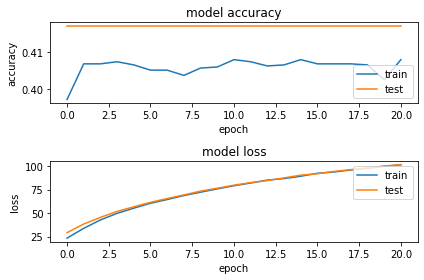

In [18]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [15]:
print(tf.version)
print(tf.executing_eagerly())

<module 'tensorflow._api.v2.version' from 'C:\\Users\\HC\\anaconda3\\envs\\CN\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
True


In [35]:
# Load trained model and evaluate with test dataset
mnist_model = model
loss_and_metrics = mnist_model.evaluate(testX, testY, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

# Do a more deep evaluation
print(testX.shape)

# load the model and create predictions on the test set
predicted_classes = mnist_model.predict(testX.to_numpy()) #mnist_model.predict_class provides the int decoded value
thresh =(predicted_classes.max()+ predicted_classes.min())/2

predicted_classes[predicted_classes>thresh]=1
predicted_classes[predicted_classes<=thresh]=0




ret=[]
for line in predicted_classes:
    ret.append(int("".join(str(int(x)) for x in line), 2))
    
print(pd.unique(ret))

rindex=np.random.randint(len(ret),size=(1,1))[0,0]
print(rindex)

print("Should be:"+str(testY.to_numpy()[rindex]))
print("Predicted:"+str(predicted_classes[rindex]))
print("Other results:"+str(predicted_classes[15:24]))
# see which we predicted correctly and which not
correctByLine=[]
for i in range(len(testY)):
    matches = predicted_classes[i]==testY.to_numpy()[i]
    correctByLine.append(len(matches[matches==True])/len(matches))
print("Dif:"+str(predicted_classes[rindex]==testY.to_numpy()[rindex]))
#print(correctByLine)
correct_indices = np.nonzero([x for x in correctByLine if x>0.8])[0]
print(len(correct_indices)," classified 80% correctly")
correct_indices = np.nonzero([x for x in correctByLine if x>0.9])[0]
print(len(correct_indices)," classified 90% correctly")
correct_indices = np.nonzero([x for x in correctByLine if x>0.95])[0]
print(len(correct_indices)," classified 95% correctly")
correct_indices = np.nonzero([x for x in correctByLine if x>0.99])[0]
print(len(correct_indices)," classified 99% correctly")

correct_indices = np.nonzero([x for x in correctByLine if x==1])[0]
print(len(correct_indices)," classified 100% correctly")

incorrect_indices = np.nonzero([x for x in correctByLine if x!=1])[0]

print(len(incorrect_indices)," classified incorrectly (Not 100%)")
print("ACTUAL HARD ACCURACY :" +str(100*len(correct_indices)/len(predicted_classes))+"%")

37/37 - 0s - loss: 29.1543 - accuracy: 0.4171 - categorical_accuracy: 0.4171 - false_negatives: 5092.0000
Test Loss 29.15431785583496
Test Accuracy 0.41709402203559875
(1170, 131)
[20282448289277898092080841883648]
322
Should be:[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Predicted:[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Other results:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Dif:[ True  Tru

In [38]:
results = predicted_classes==testY.to_numpy()
#print(results[results==True])
testsNeeded = [];
for line in results:
    #print(line)
    #print(onlyTestCols.shape)
    #print(onlyTestCols[line])
    testsNeeded.append(onlyTestCols[line])
#testsNeeded= np.array(testsNeeded)
print(testsNeeded[0])

[' Blood tests' ' Skin biopsy' ' Patch test' ' Complete blood count (CBC)'
 ' Polymerase chain reaction (PCR)' ' ' 'Skin Prick Test (SPT)'
 'Intradermal Skin Test' 'Physicial examination' ' TSH test' 'T4 test'
 ' Thyroid scan' ' Thyroid ultrasound' ' Physical examination'
 'Esophagram ' 'Esophageal manometry ' 'pH monitoring' 'Endoscopy'
 'Biopsy of upper disgestive system' 'X-ray of upper digestive system'
 'Serum bilirubin test' 'Serum albumin test'
 'Serum alkaline phosphatase test'
 'Serum aminotransferases (transaminases)' 'Prothrombin time (PTT) test'
 'Alanine transaminase (ALT) test' 'Liver Ultrasound ' 'Liver Biopsy'
 'MRI' 'CT Scan' 'X-ray to affected area' 'MRI to affected area'
 'Electronystagmography (ENG) ' 'Videonystagmography (VNG)'
 ' Fasting plasma glucose (FPG) test' 'Hemoglobin A1C test'
 ' Random plasma glucose (RPG) test' ' Blood Test '
 ' Electrocardiogram (ECG)' ' Echocardiogram' 'Ambulatory monitoring'
 'Urine analysis' ' Upper gastrointestinal endoscopy'
 ' Up